<a href="https://colab.research.google.com/github/Sara2539360/Excel/blob/main/Final_ML_Project_E_Comm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Sara2539360/Final-ML-E-Comm/refs/heads/main/Train.csv')

In [24]:
print("Dataset Shape:", df.shape)

Dataset Shape: (10999, 12)


In [25]:
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [26]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [27]:
print("Data Types:\n", df.dtypes)

Data Types:
 ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


In [28]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [29]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Visualizatios

###  Histogram of Numerical Features

#### Discount_offered:
Skewed distribution indicating discounts are concentrated in a specific range.
#### Customer_rating:
 Nearly uniform distribution, highlighting consistent customer responses.
#### Weight_in_gms:
 Normal-like distribution with a peak near the center.

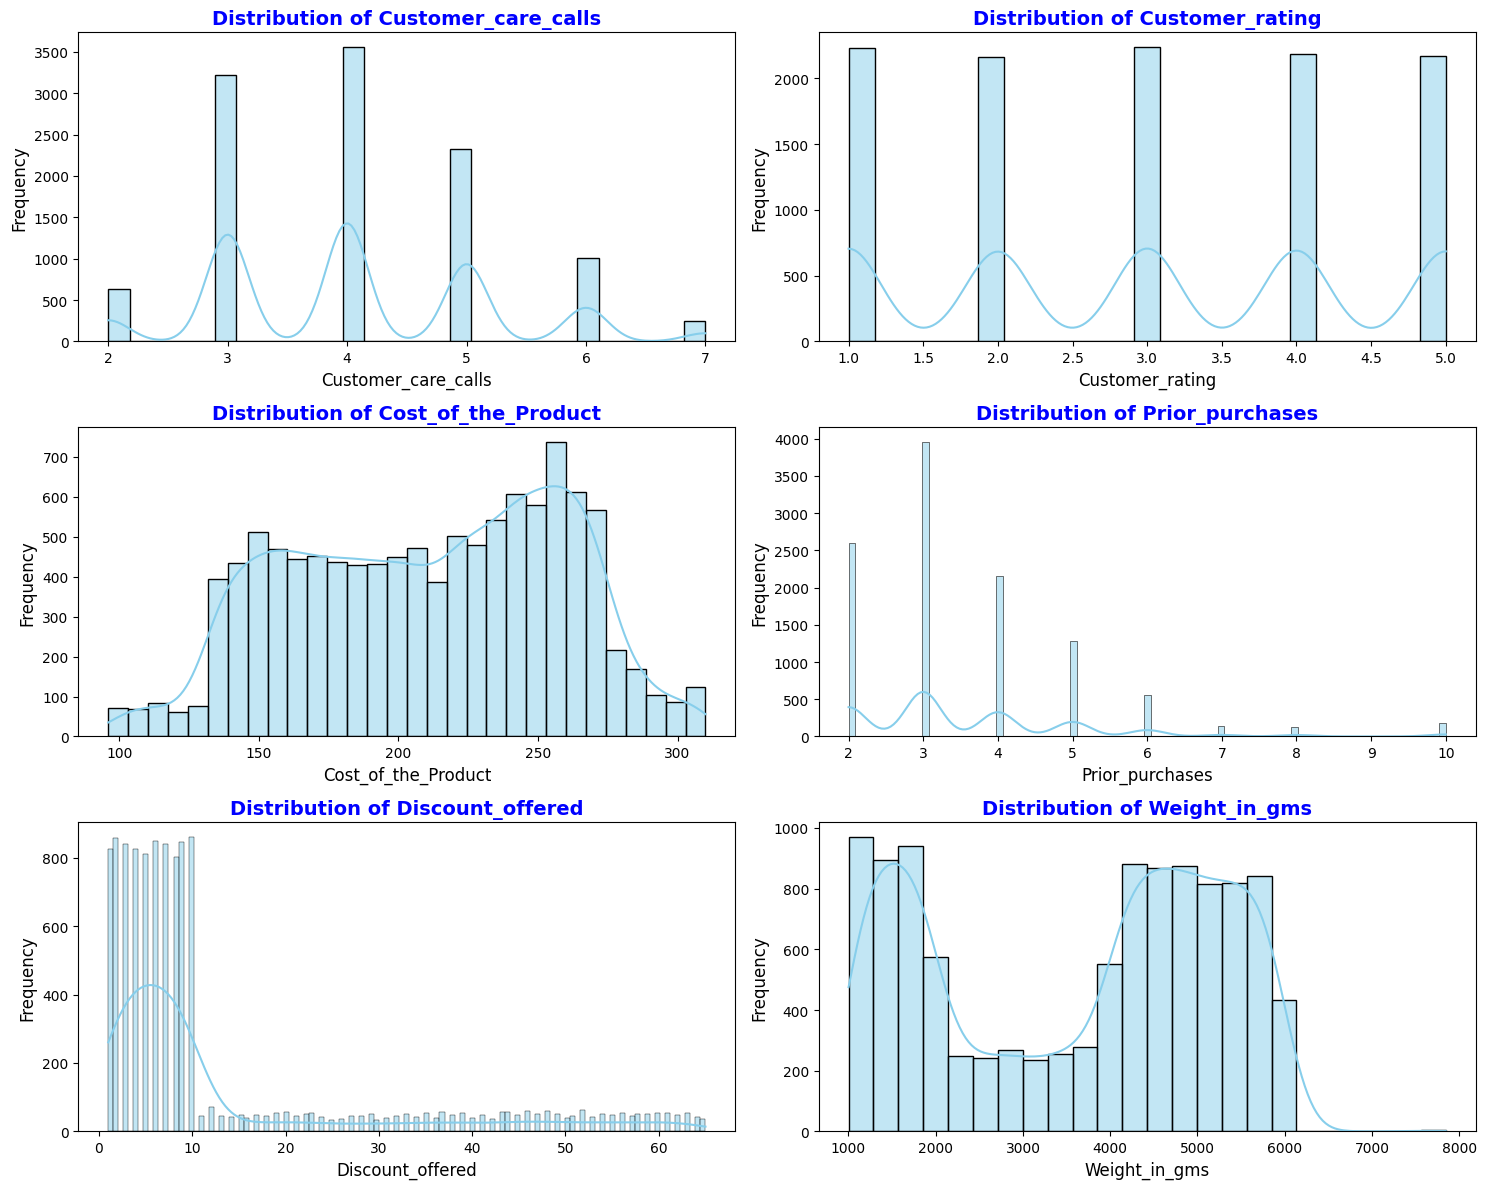

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

numerical_columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                     'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold', color='blue')
    plt.xlabel(col, fontsize=12, color='black')
    plt.ylabel('Frequency', fontsize=12, color='black')
plt.tight_layout()
plt.show()


## Count plot

#### Warehouse_block:
Blocks A and F have the highest counts.
#### Gender:
Balanced dataset, though slightly more males.

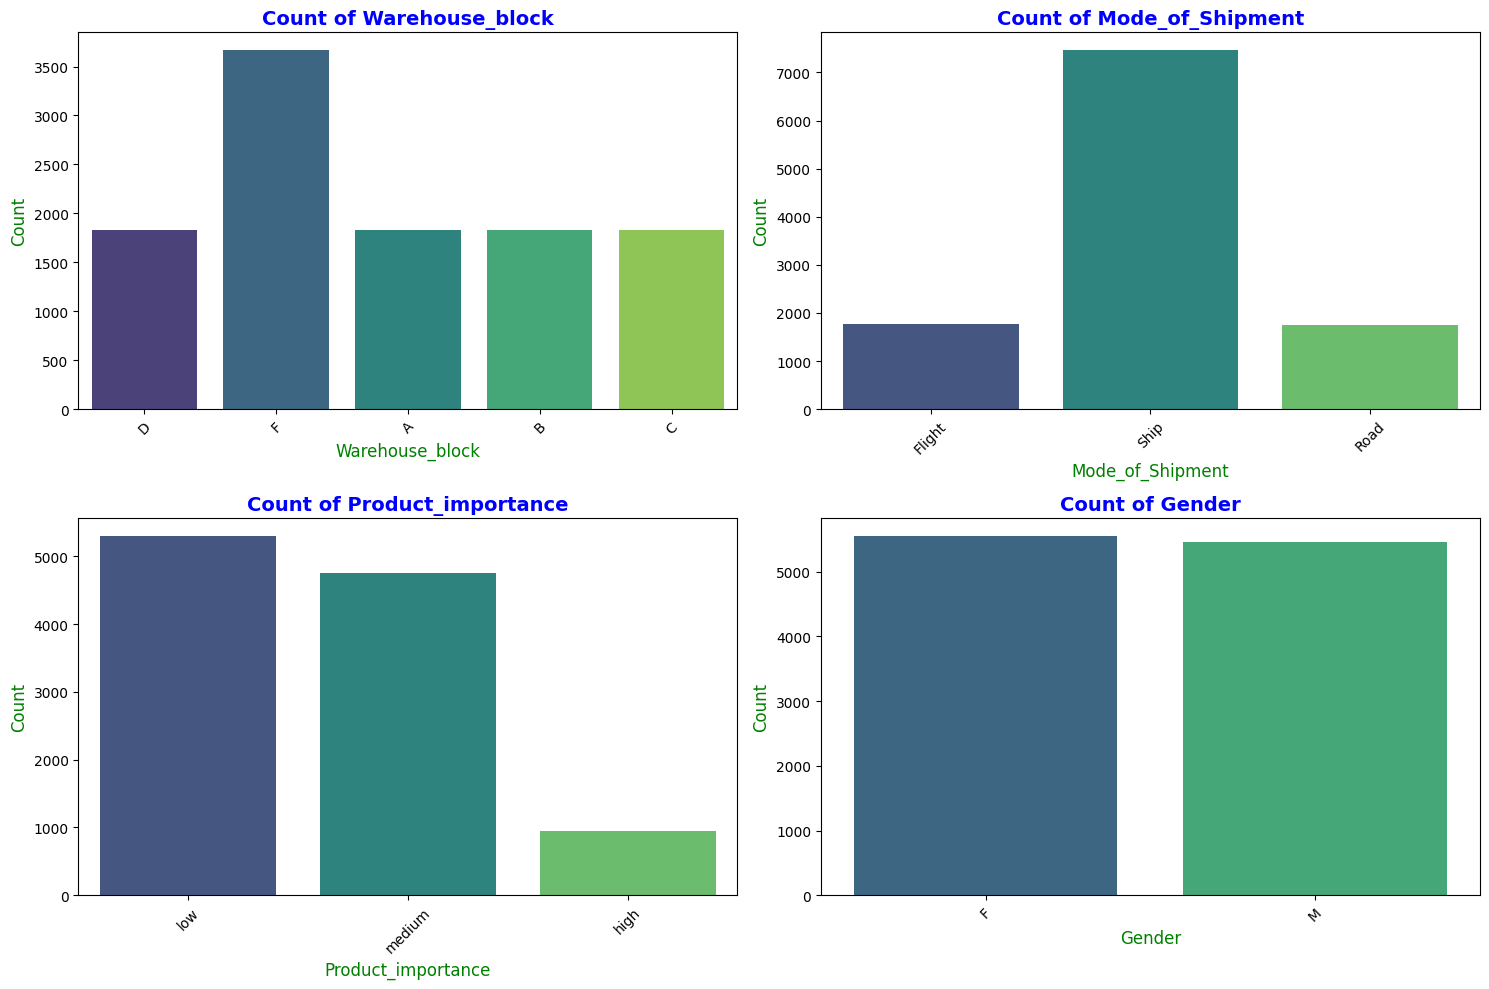

In [31]:
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}', fontsize=14, fontweight='bold', color='blue')
    plt.xlabel(col, fontsize=12, color='green')
    plt.ylabel('Count', fontsize=12, color='green')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Box Plot
Mode of Shipment vs. Customer Ratings

Air shipment has the highest median rating, and on-time deliveries are better rated across all modes.


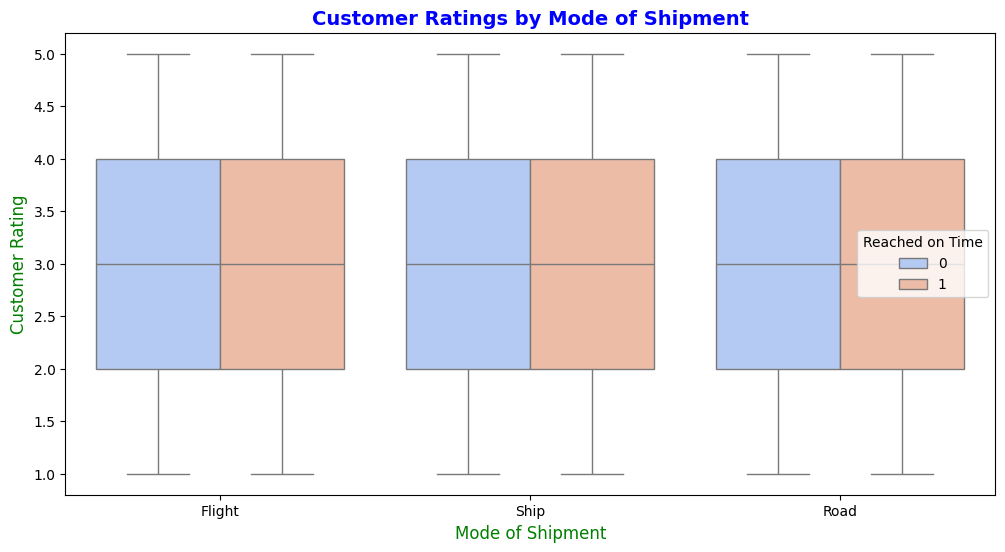

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Mode_of_Shipment', y='Customer_rating', hue='Reached.on.Time_Y.N', palette='coolwarm')
plt.title('Customer Ratings by Mode of Shipment', fontsize=14, fontweight='bold', color='blue')
plt.legend(title='Reached on Time', loc='upper right')
plt.xlabel('Mode of Shipment', fontsize=12, color='green')
plt.ylabel('Customer Rating', fontsize=12, color='green')
plt.legend(title='Reached on Time', loc='best')
plt.show()


## Box Plot
Product Importance vs. Discount Offered


Low-importance products offer higher discounts, while high-importance products rarely offer discounts.

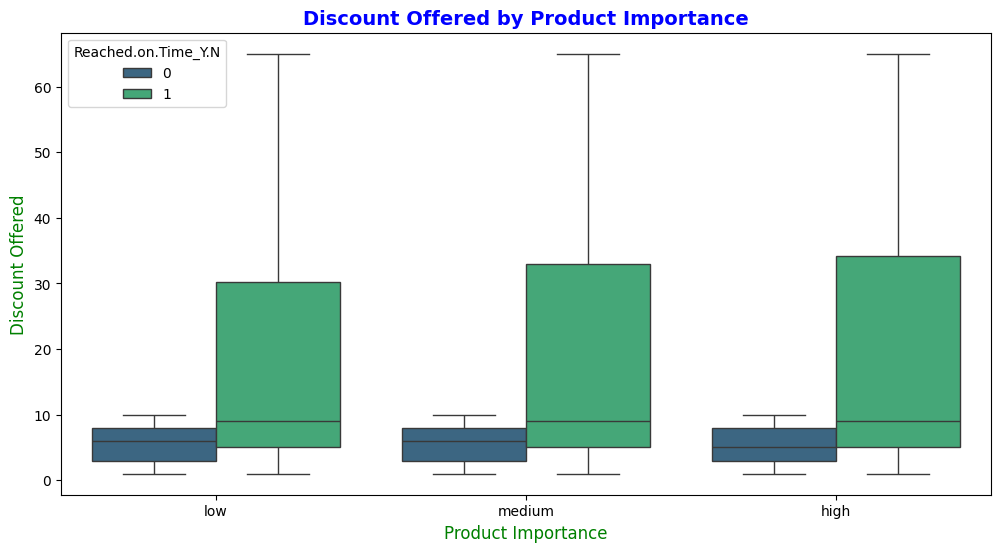

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_importance', y='Discount_offered', hue='Reached.on.Time_Y.N', palette='viridis')
plt.title('Discount Offered by Product Importance', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Product Importance', fontsize=12, color='green')
plt.ylabel('Discount Offered', fontsize=12, color='green')
plt.show()


## Scatter Plot:

#### Customer Care Calls vs. Prior Purchases

Higher customer care calls often correspond to late deliveries.

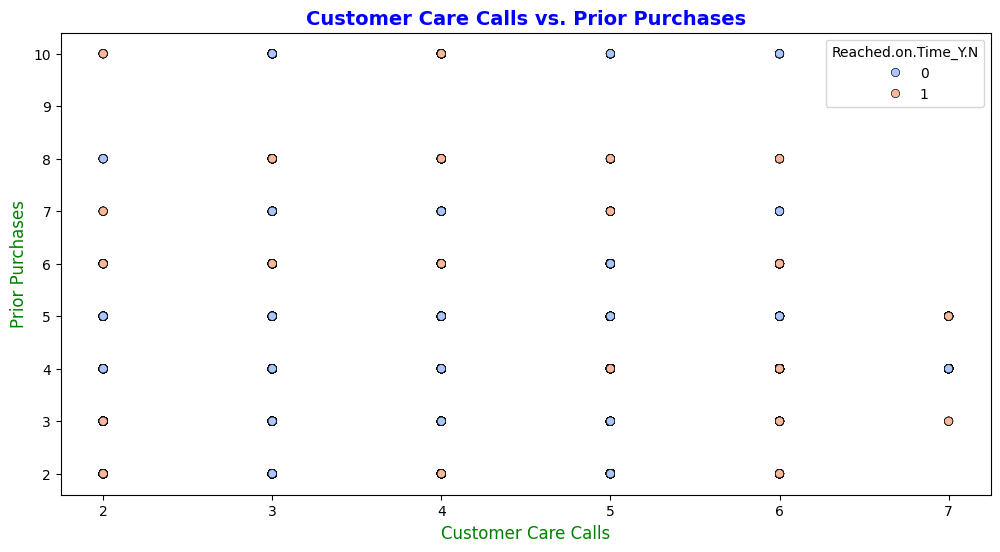

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Customer_care_calls', y='Prior_purchases', hue='Reached.on.Time_Y.N', palette='coolwarm', edgecolor='black')
plt.title('Customer Care Calls vs. Prior Purchases', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Customer Care Calls', fontsize=12, color='green')
plt.ylabel('Prior Purchases', fontsize=12, color='green')
plt.show()


## Box Plot:

#### Weight in Grams vs. Shipment Mode

Air shipments handle lighter items, while trucks handle heavier shipments.


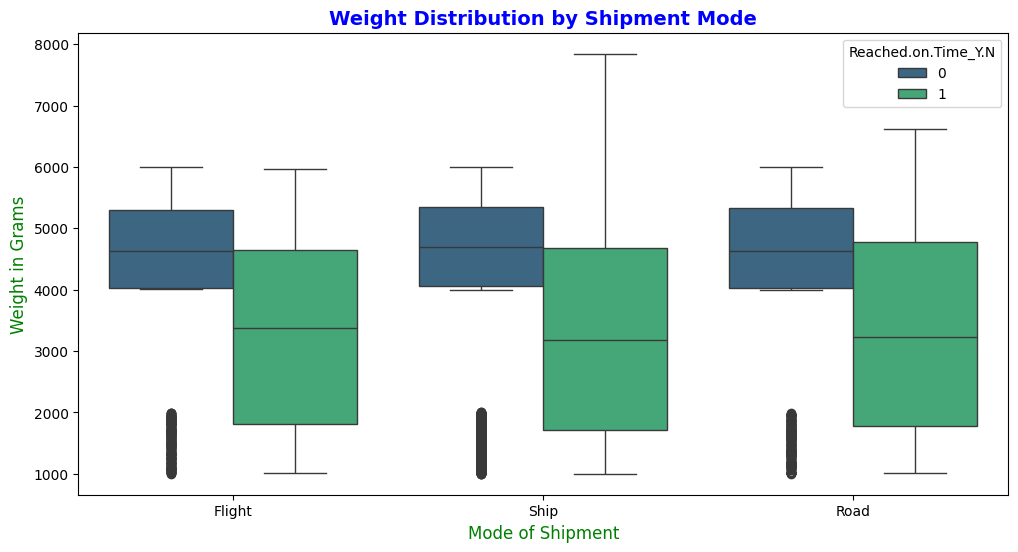

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Mode_of_Shipment', y='Weight_in_gms', hue='Reached.on.Time_Y.N', palette='viridis')
plt.title('Weight Distribution by Shipment Mode', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Mode of Shipment', fontsize=12, color='green')
plt.ylabel('Weight in Grams', fontsize=12, color='green')
plt.show()


## Violin Plot:

#### Gender vs. Customer Rating
Both genders show similar rating distributions, but males tend to have slightly better ratings for on-time deliveries.

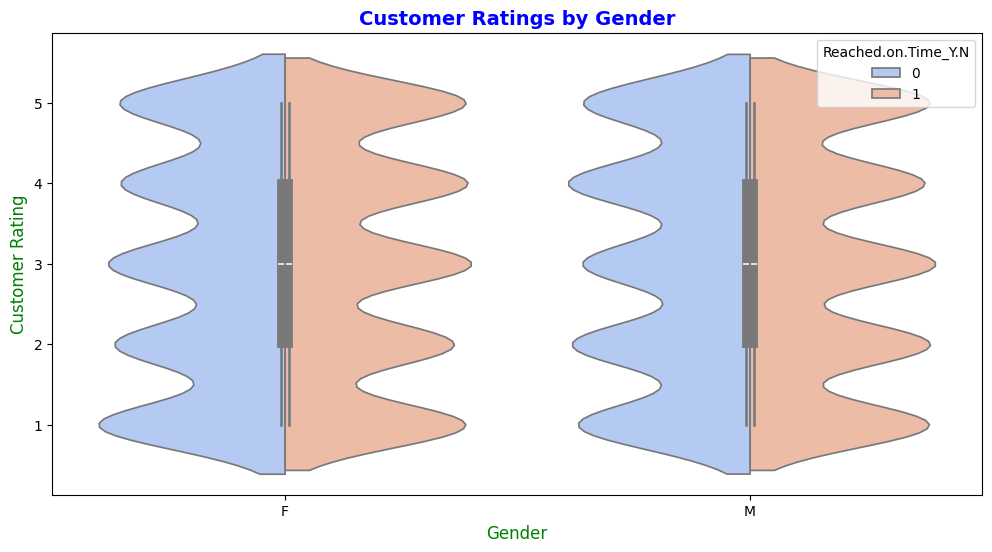

In [36]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Gender', y='Customer_rating', hue='Reached.on.Time_Y.N', split=True, palette='coolwarm')
plt.title('Customer Ratings by Gender', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Gender', fontsize=12, color='green')
plt.ylabel('Customer Rating', fontsize=12, color='green')
plt.show()


## Count Plot:

#### Reached on Time vs. Product Importance
High-importance products face slightly more delays compared to low-importance products.

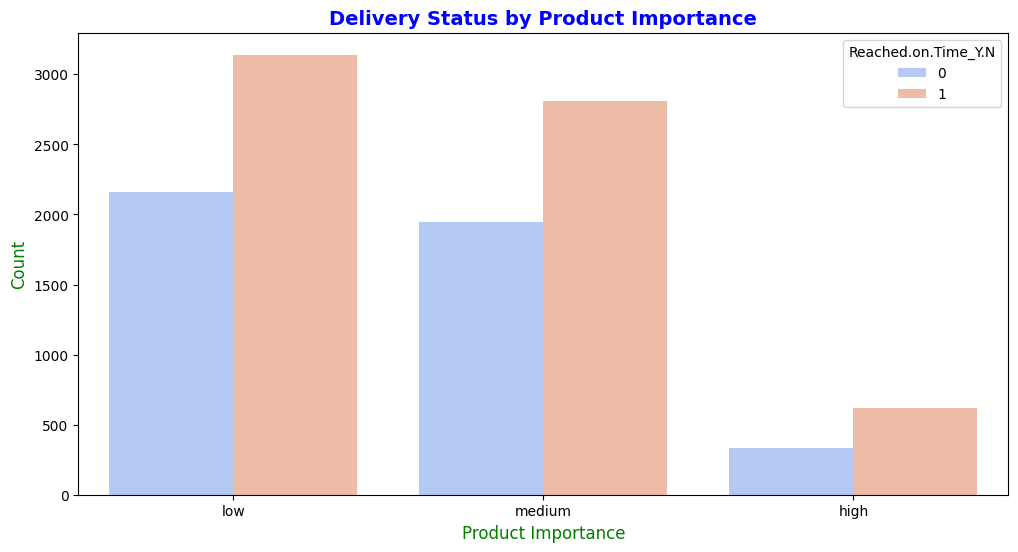

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_importance', hue='Reached.on.Time_Y.N', palette='coolwarm')
plt.title('Delivery Status by Product Importance', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Product Importance', fontsize=12, color='green')
plt.ylabel('Count', fontsize=12, color='green')
plt.show()


## Scatter Plot:

####  Customer Rating vs. Prior Purchases
Higher ratings correlate with fewer prior purchases and better delivery times.

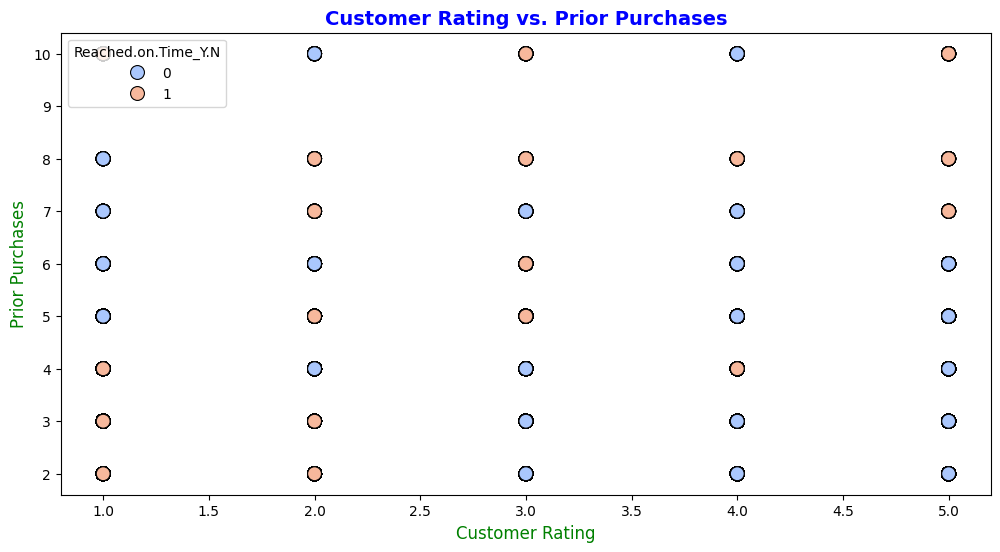

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Customer_rating', y='Prior_purchases', hue='Reached.on.Time_Y.N', palette='coolwarm', s=100, edgecolor='black')
plt.title('Customer Rating vs. Prior Purchases', fontsize=14, fontweight='bold', color='blue')
plt.xlabel('Customer Rating', fontsize=12, color='green')
plt.ylabel('Prior Purchases', fontsize=12, color='green')
plt.show()


## Scatter Plot:

#### Customer Care Calls vs. Discount Offered

Customers making more care calls tend to receive higher discounts but still report delayed deliveries.

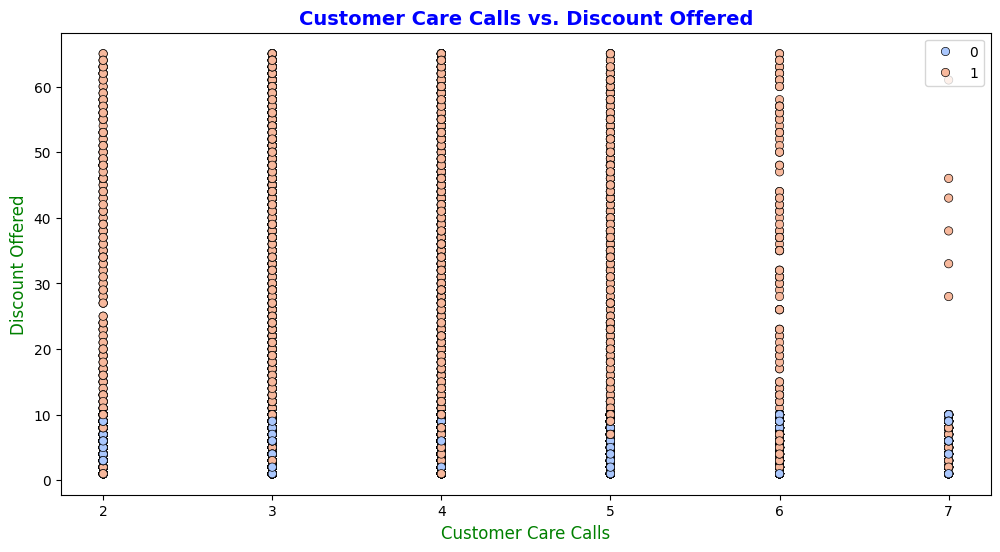

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Customer_care_calls', y='Discount_offered', hue='Reached.on.Time_Y.N', palette='coolwarm', edgecolor='black')
plt.title('Customer Care Calls vs. Discount Offered', fontsize=14, fontweight='bold', color='blue')
plt.legend(loc='upper right')
plt.xlabel('Customer Care Calls', fontsize=12, color='green')
plt.ylabel('Discount Offered', fontsize=12, color='green')
plt.show()


## Feature Engineering
 Label Encoding (For Categorical )

In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Warehouse_block'] = label_encoder.fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment'] = label_encoder.fit_transform(df['Mode_of_Shipment'])
df['Product_importance'] = label_encoder.fit_transform(df['Product_importance'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Reached.on.Time_Y.N'] = label_encoder.fit_transform(df['Reached.on.Time_Y.N'])

print(df.head())


   ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0   1                3                 0                    4   
1   2                4                 0                    4   
2   3                0                 0                    2   
3   4                1                 0                    3   
4   5                2                 0                    2   

   Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  \
0                2                  177                3                   1   
1                5                  216                2                   1   
2                2                  183                4                   1   
3                3                  176                4                   2   
4                2                  184                3                   2   

   Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0       0                44           1233                    

##  Feature Scaling (For Numerical Features)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = ['Cost_of_the_Product', 'Weight_in_gms', 'Customer_care_calls', 'Prior_purchases', 'Discount_offered']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df[numerical_columns].head())


   Cost_of_the_Product  Weight_in_gms  Customer_care_calls  Prior_purchases  \
0            -0.690722      -1.468240            -0.047711        -0.372735   
1             0.120746      -0.333893            -0.047711        -1.029424   
2            -0.565881      -0.159002            -1.799887         0.283954   
3            -0.711529      -1.502484            -0.923799         0.283954   
4            -0.545074      -0.703244            -1.799887        -0.372735   

   Discount_offered  
0          1.889983  
1          2.815636  
2          2.136824  
3         -0.208162  
4          2.013404  


## Model Building

#### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()


logreg.fit(X_train, y_train)


y_pred_logreg = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.6513636363636364
              precision    recall  f1-score   support

           0       0.56      0.65      0.60       895
           1       0.73      0.66      0.69      1305

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.65      2200



#### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6781818181818182
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       895
           1       0.79      0.62      0.70      1305

    accuracy                           0.68      2200
   macro avg       0.69      0.69      0.68      2200
weighted avg       0.71      0.68      0.68      2200



#### Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.6840909090909091
              precision    recall  f1-score   support

           0       0.57      0.89      0.70       895
           1       0.88      0.54      0.67      1305

    accuracy                           0.68      2200
   macro avg       0.73      0.72      0.68      2200
weighted avg       0.76      0.68      0.68      2200



#### SVM

In [53]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6863636363636364
              precision    recall  f1-score   support

           0       0.57      0.91      0.70       895
           1       0.90      0.53      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.69      2200
weighted avg       0.77      0.69      0.68      2200



## Model Comparision and Evaluation

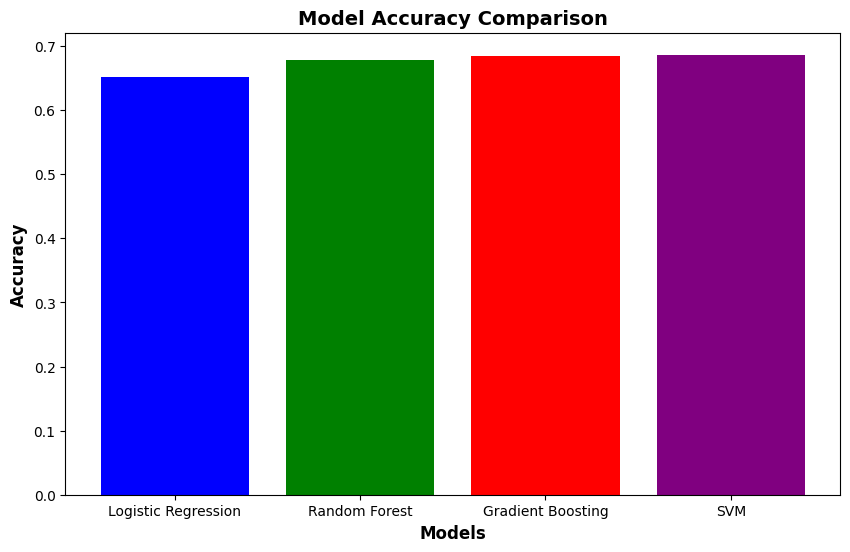

Best Model: Random Forest (based on accuracy)
              precision    recall  f1-score   support

           0       0.58      0.77      0.66       895
           1       0.79      0.62      0.70      1305

    accuracy                           0.68      2200
   macro avg       0.69      0.69      0.68      2200
weighted avg       0.71      0.68      0.68      2200



In [54]:
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_logreg),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb),
    'SVM': accuracy_score(y_test, y_pred_svm)
}

plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.show()

print("Best Model: Random Forest (based on accuracy)")
print(classification_report(y_test, y_pred_rf))


## Hyperparameter Tuning